<center>
    <img src="https://camo.githubusercontent.com/37c5dfc561cbb402706d503622713e864582845187fa9f97800f5751320671b3/68747470733a2f2f65787465726e616c2d636f6e74656e742e6475636b6475636b676f2e636f6d2f69752f3f753d687474707325334125324625324661692d6a6f75726e65792e636f6d25324677702d636f6e74656e7425324675706c6f61647325324632303139253246303625324666726175642d454d562d636869702d6372656469742d636172642e6a706726663d31266e6f66623d31" width="400" alt="cognitiveclass.ai logo"  />

</center>



# Detecção de Fraudes em Cartões de Crédito


--------------------------------

Aluna: **Eliane Kelm** 

*Conteúdo técnico referente ao Relatório Final apresentado à PUC-Minas (Curso: Inteligência Artificial e Aprendizado de Máquina, 2022)*

---------------------------------

## Objetivos


Desenvolver um modelo de Machine Learning capaz de detectar transações fraudulentas com maior precisão. Para isto, serão testados os seguintes modelos:

* Regressão Logística

* Árvores de Decisão 

* SVM (Support Vector Machine)

A fonte escolhida foi o dataset Credit Card Fraud Detection, que contém transações feitas em cartões de crédito durante o mês de setembro de 2013 por titulares europeus.

Ao todo são:

    - 284.807 observações
    - 31 variáveis


Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud




## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
1. [Coleta e Tratamento dos Dados](#1)<br>
2. [Análise Exploratória](#2)<br>
3. [Preparação dos Dados para os Modelos de Machine Learning](#3)<br>
      I. [Normalização dos Dados](#11)<br>
      II. [Divisão dos Dados em Treino e Teste](#12)<br>
      III. [Balanceamento dos Dados](#13)<br>
4. [Aplicação dos Modelos de ML](#4)<br>   
      I. [Logistic Regression](#41)<br>
      II. [Decision Tree](#42)<br>
      III. [SVM - Support Vector Machine](#43)<br>
    
</div>
<hr>


# Coleta e Tratamento dos Dados <a id="1"></a>

A preparação de dados consiste na coleta, limpeza e transformação dos dados brutos. 

Nesta etapa os dados serão ajustados para que ganhem significado e possam ser utilizados nas tomadas de decisões.

In [1]:
# Importando os módulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
 
# Importando filtro de warning
from warnings import simplefilter

# Ignorarando futuros warnings
simplefilter(action='ignore', category=FutureWarning)

plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Importando o arquivo armazenado na nuvem através do link 
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# Carregando o dataset
df = pd.read_csv(file_path)

In [3]:
# Verificando o formato dos dados
print("Tamanho do Dataset \nrows:",df.shape[0]," columns:", df.shape[1])

Tamanho do Dataset 
rows: 284807  columns: 31


--------------------------------------------------------------------------------------------------------------------------------
As features passaram pela transformação PCA, para que ficassem descaracterizadas (anônimas) preservando as informações dos clientes e que estão em valores numéricos. 

Apenas as colunas Time e Amount foram mantidas com seus valores originais.

Nossa variável **alvo** - (target) está localizada na coluna Class, onde:

   * 1 é uma transação fraudulenta;
   
   * 0 é uma transação comum.

In [4]:
# Verificando as primeiras linhas do dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Verificando se existem valores ausentes
df.isnull().values.any()

False

In [6]:
# Verificando se existem valores nulos para cada variável em particular

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Não há dados ausentes em todo o conjunto de dados.

------------

In [7]:
# Verificando os tipos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

As variáveis são exclusivamente numéricas.

#### Variável Class - `Target`

<div style="align:left">

|    |     Description        |
| ------- | ------------------- |
| **0**   | transação normal |
| **1**    | transação fraudulenta      |
    
</div>


In [8]:
# Verificando relatório com medidas estatísticas
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


-----------------------------------------------------------------------
Através do método `describe()` e olhando para a variável **Time**, podemos confirmar que os dados contêm 284.807 transações, durante 2 dias consecutivos (ou 172.792 segundos).

In [9]:
# Verificando as colunas
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Desequilíbrio dos dados

Vamos verificar o desequilíbrio dos dados em relação ao valor alvo, ou seja, **Class**.

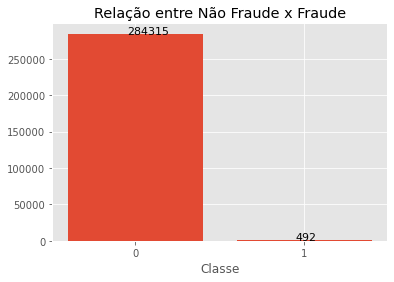

In [10]:
# Checando o balanceamento das classes

height = df.groupby('Class')['Class'].count().values
bars = df.groupby('Class')['Class'].count().index
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)

# Colocando o total em cada barra
for i in range (0, len(y_pos)):
    plt.text(x = i - 0.05, y = height[i], s = height[i], size = 11)
    
plt.xticks(y_pos, bars,  fontsize = 10)
plt.title('Relação entre Não Fraude x Fraude')
plt.xlabel('Classe')

fig = plt.gcf()
plt.show()
fig.savefig('fig_class.png', format='png')

Apenas 492 (ou 0,172%) das transações são fraudulentas. Isso significa que os dados são altamente desequilibrados em relação à variável de destino Class.
 
-----------------------------------------------------------

# Análise Exploratória <a id="2"></a>


Nesta seção, prepararemos os dados para o próximo estágio da metodologia de ciência de dados, que é a modelagem. Esse estágio envolve explorar mais os dados e garantir que eles estejam no formato correto para o algoritmo de aprendizado de máquina que selecionamos no estágio de abordagem analítica.

Vamos verificar se existe correlação entre as variáveis.

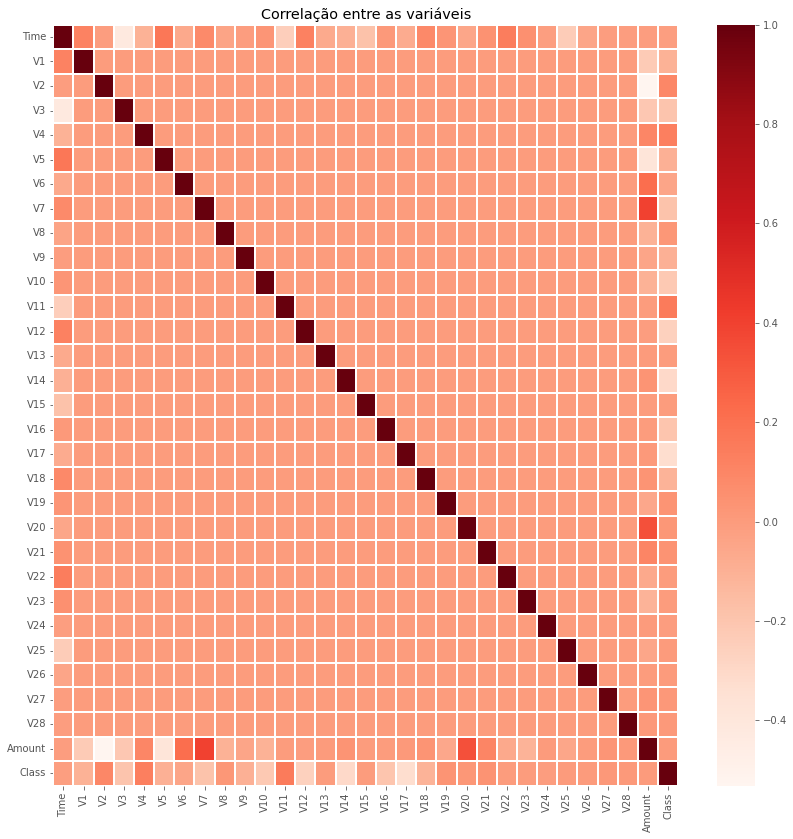

In [11]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade

plt.figure(figsize = (14,14))
plt.title('Correlação entre as variáveis')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

Como esperado, não há correlação notável entre os recursos V1-V28. Existem certas correlações entre algumas dessas características e Tempo (correlação inversa com V3) e Quantidade (correlação direta com V7 e V20, correlação inversa com V1 e V5).

A diagonal escura mostra uma forte correlação porque é a correlação de uma variável com ela mesma, que no caso é +1 (um).

Quanto maior o valor da correlação entre cada variável (N a N) o gráfico fica mais escuro.

  
### Coeficiente de Correlação

|    |     Description        |
| ------- | ------------------- |
| +1   | forte correlação positiva |
| 0    | não há correlação      |
| -1   | forte correlação negativa |

In [12]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.23,-0.10
V2,-0.01,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.53,0.09
V3,-0.42,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,0.00,...,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.21,-0.19
V4,-0.11,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,...,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.10,0.13
V5,0.17,0.00,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,0.00,...,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39,-0.09
V6,-0.06,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22,-0.04
V7,0.08,-0.00,0.00,0.00,-0.00,0.00,0.00,1.00,0.00,0.00,...,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.40,-0.19
V8,-0.04,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10,0.02
V9,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,-0.10


### Histograma Time x Class

Text(0.5, 0, 'Tempo (s)')

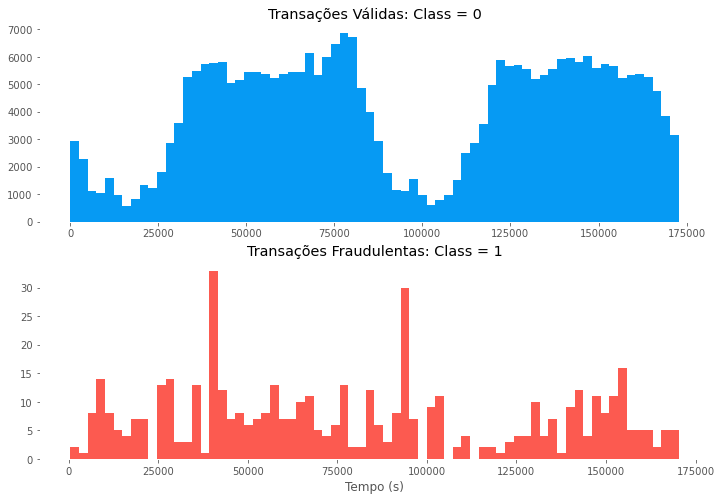

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))

num_bins = 70

ax[0].hist(df.Time[df.Class == 0], bins=num_bins, color='xkcd:azure')
ax[0].set_title('Transações Válidas: Class = 0')
ax[0].set_facecolor('xkcd:white')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins, color='xkcd:coral')
ax[1].set_title('Transações Fraudulentas: Class = 1')
ax[1].set_facecolor('xkcd:white')

plt.xlabel('Tempo (s)')

### Boxplot Class x Amount

Boxplot para checar a distribuição em relação ao valor das transações

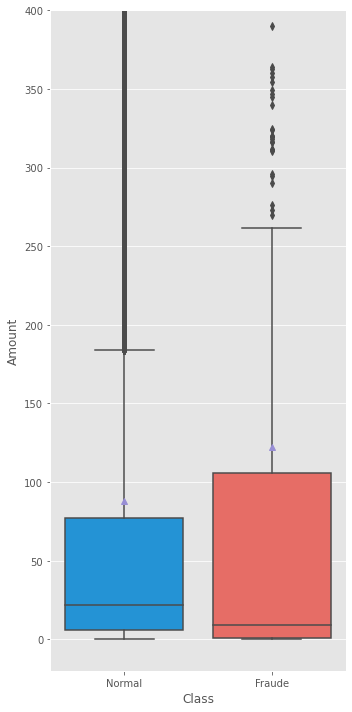

In [14]:
fig, ax = plt.subplots(figsize=(5,10), sharex=True)

paleta = {classes: "xkcd:azure" if classes == 0 else "xkcd:coral" for classes in df.Class.unique()}

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax, palette=paleta) # x: df.Class, y: df.Amount
plt.ylim((-20, 400))

# Como no eixo x temos diversos valores possíveis
# para df.Class, podemos alterar os rótulos desses ticks.
plt.xticks([0, 1], ['Normal', 'Fraude']) 

plt.tight_layout()

# Preparação dos Dados para os Modelos de Machine Learning <a id="3"></a>

    
<div class="alert alert-block alert-info" style="margin-top: 20px">
    
I. [Normalização dos Dados](#11)<br>
II. [Divisão dos Dados em Treino e Teste](#12)<br>
III. [Balanceamento dos Dados](#13)<br>
   
    
</div>
<hr>

### I. Normalização dos Dados <a id="11"></a>

Os dados das colunas Time e Amount estão com grande variação e por isso precisam ser normalizados. Para isto, utilizaremos a classe `StandardScaler`que, segundo a documentação oficial:
        
        | Padroniza as features removendo a média e escala a variância a uma unidade.|
        
Fonte: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [15]:
# Importando pacotes nescessários para a normalização
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
# Criando cópia do DataFrame 
df_clean = df.copy()

# Padronizando as colunas Time e Amount
scaler = StandardScaler()

df_clean['Scaler_amount'] = scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['Scaler_time'] = scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

In [17]:
# Visualizando o resultado para a variável Amount
df_clean['Scaler_amount']

0         0.24
1        -0.34
2         1.16
3         0.14
4        -0.07
          ... 
284802   -0.35
284803   -0.25
284804   -0.08
284805   -0.31
284806    0.51
Name: Scaler_amount, Length: 284807, dtype: float64

In [18]:
# Visualizando o resultado para a variável Time
df_clean['Scaler_time']

0        -2.00
1        -2.00
2        -2.00
3        -2.00
4        -2.00
          ... 
284802    1.64
284803    1.64
284804    1.64
284805    1.64
284806    1.64
Name: Scaler_time, Length: 284807, dtype: float64

### II. Divisão dos Dados em Treino e Teste <a id="12"></a>

Vamos treinar nosso modelo dividindo-o em dados de treino (classificador) e teste (predição). Após, mediremos sua qualidade comparando as classes preditas com as classes verdadeiras da base de **teste** para medir sua habilidade em classificar corretamente dados não vistos durante o treinamento.

Este fluxo pode ser resumido pela figura a seguir:

<center>
    <img src="https://miro.medium.com/max/3080/0*rFExeO04lmFwQzZn" width="600" alt="cognitiveclass.ai logo"  />

</center>

<center>
    <h8>
Fluxo resumido de problemas de Classificação. Fonte: (ESCOVEDO & KOSHIYAMA, 2020)
    </h8>
</center>

In [19]:
# Separarando os dados entre feature matrix e target vector 
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

# Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)



### III. Balanceamento dos Dados <a id="13"></a>

Finalmente, iremos balancear os dados, de forma que nossos modelos apresentem um melhor desempenho na hora de identificar transações fraudulentas. 

Importante salientar que desta forma evitamos o `overfitting` (quando o modelo tem um bom desempenho no conjunto de treinamento, mas falha em generalizar o aprendizado para o conjunto de teste).


Faremos um comparativo entre os seguintes métodos de balancemento para verificar qual apresenta melhor desempenho.

* Unbalanced Data
* Over-Sampling (SMOTE)
* Under-Sampling (RUS)


In [20]:
# Unbalanced Data

from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_ypred = rf.predict(X_test)

print(classification_report(y_test, rf_ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.90      0.70      0.79       123

    accuracy                           1.00     71202
   macro avg       0.95      0.85      0.89     71202
weighted avg       1.00      1.00      1.00     71202



In [21]:
# SMOTE - oversampling

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=7)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

y_train_over.value_counts()

0    213236
1    213236
Name: Class, dtype: int64

In [22]:
rf2 = RandomForestClassifier()
rf2.fit(X_train_over, y_train_over)
rf2_ypred = rf2.predict(X_test)

print(classification_report(y_test, rf2_ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.83      0.81      0.82       123

    accuracy                           1.00     71202
   macro avg       0.92      0.91      0.91     71202
weighted avg       1.00      1.00      1.00     71202



In [23]:
# Under-Sampling (RUS)

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

y_train_un.value_counts()

0    369
1    369
Name: Class, dtype: int64

In [24]:
rf3 = RandomForestClassifier()
rf3.fit(X_train_un, y_train_un)
rf3_ypred = rf3.predict(X_test)

print(classification_report(y_test, rf3_ypred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.07      0.89      0.12       123

    accuracy                           0.98     71202
   macro avg       0.53      0.94      0.56     71202
weighted avg       1.00      0.98      0.99     71202



In [25]:
# Agregando os dados em listas para tornar mais simples a comparação entre os métodos

from sklearn.metrics import precision_recall_fscore_support, accuracy_score,balanced_accuracy_score

acc=[]
acc.append(accuracy_score(y_test, rf_ypred))
acc.append(accuracy_score(y_test, rf2_ypred))
acc.append(accuracy_score(y_test, rf3_ypred))

bacc=[] 
bacc.append(balanced_accuracy_score(y_test, rf_ypred))
bacc.append(balanced_accuracy_score(y_test, rf2_ypred))
bacc.append(balanced_accuracy_score(y_test, rf3_ypred))

rfm = precision_recall_fscore_support(y_test, rf_ypred, average='macro')
rfm2 = precision_recall_fscore_support(y_test, rf2_ypred, average='macro')
rfm3 = precision_recall_fscore_support(y_test, rf3_ypred, average='macro')

precision = [rfm[0],rfm2[0],rfm3[0]]
recall = [rfm[1],rfm2[1],rfm3[1]]
f1 = [rfm[2],rfm2[2],rfm3[2]]
f1 = [rfm[2],rfm2[2],rfm3[2]]

metrics = pd.DataFrame()
metrics['Models'] = ['Unbalanced','SMOTE','Undersampling']

metrics['Precision'] = precision
metrics['Recall'] = recall
metrics['F1score'] = f1
metrics['Accuracy'] = acc
metrics['balanced_accuracy_score'] = bacc
metrics

,Models,Precision,Recall,F1score,Accuracy,balanced_accuracy_score
0,Unbalanced,0.95,0.85,0.89,1.00,0.85
1,SMOTE,0.92,0.91,0.91,1.00,0.91
2,Undersampling,0.53,0.94,0.56,0.98,0.94


In [34]:
# Plotando os dados em um gráfico de barras

import plotly.express as px

metricsdf=pd.melt(metrics,id_vars=['Models'],var_name='metrics', value_name='value')

fig = px.bar(metricsdf, x="Models", color="metrics",
             y='value',
             title="Comparação de desempenho entre os Modelos ",
             barmode='group',
             
            )


a= fig.show()
a

Com base nos dados apresentados chegamos a conclusão que o médoto `SMOTE` foi o que apresentou o melhor desempenho.


# Aplicação dos Modelos de ML <a id="4"></a>

### I. Logistic Regression <a id="41"></a>


Regressão Logística é um algoritmo de aprendizado de máquina usado para problemas de classificação, é um algoritmo de análise preditiva e se baseia no conceito de probabilidade.

In [27]:
# Utilizando Regressão Logística com dados desbalanceados

# Importação do modelo
from sklearn.linear_model import LogisticRegression

# Instanciando o modelo
model_des = LogisticRegression()

# Fit do modelo (treinamento)
model_des.fit(X_train, y_train)

# Realizando previsões em cima de novos dados
y_pred = model_des.predict(X_test)

In [28]:
# Instalar pacote para plotar matriz de confusão
!pip install -q scikit-plot

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9994    0.9999    0.9996     71079
           1     0.8953    0.6260    0.7368       123

    accuracy                         0.9992     71202
   macro avg     0.9474    0.8129    0.8682     71202
weighted avg     0.9992    0.9992    0.9992     71202

Acurácia: 0.9992

AUC: 0.8129



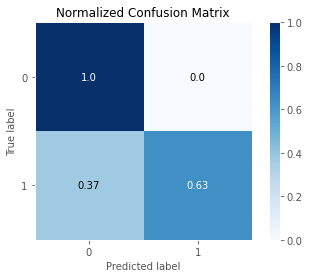

In [29]:
# Plotagem da Matriz de Confusão

import scikitplot as skplt
fig = skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# Relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# Acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# Imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

In [39]:
# Utilizando Regressão Logística com dados balanceados pelo método RUS

model_bal = LogisticRegression()

#Fit do modelo (treinamento)
model_bal.fit(X_train_un, y_train_un)

# Realizando previsões em cima de novos dados
y_pred_rus = model_bal.predict(X_test)
y_proba_rus = model_bal.predict_proba(X_test)


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9694    0.9844     71079
           1     0.0481    0.8943    0.0913       123

    accuracy                         0.9693     71202
   macro avg     0.5240    0.9318    0.5378     71202
weighted avg     0.9982    0.9693    0.9828     71202

Acurácia: 0.9693

AUC: 0.9318



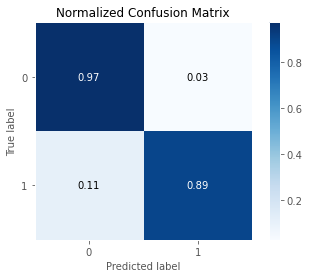

In [40]:
# Plotagem da matriz de confusão
fig = skplt.metrics.plot_confusion_matrix(y_test, y_pred_rus, normalize=True)

# Imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rus, digits=4))

# Imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_rus)))

# Imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_rus)))

### II. Decision Tree <a id="42"></a>

Árvores de decisão são construídas a partir de um processo de indução, onde os dados são divididos em subconjuntos cada vez mais puros, dessa forma é encontrada a maior pureza em sua classificação. 

Para selecionar quais atributos serão utilizados na composição da árvore, é considerado o grau de entropia de um nó e a informação ganha após um split.

In [36]:
# Construção do Modelo sem Balanceamento dos Dados

# Escolher e importar o modelo
from sklearn.tree import DecisionTreeClassifier

# Escolher os Hyperparâmetros
model_tree = DecisionTreeClassifier(max_depth=4, criterion='entropy')

# Fit do Modelo(Treinar)
model_tree.fit(X_train, y_train)

# Fazer previsões em cima dos dados de teste
y_pred_tree = model_tree.predict(X_test)

              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9997     71079
           1     0.8725    0.7236    0.7911       123

    accuracy                         0.9993     71202
   macro avg     0.9360    0.8617    0.8954     71202
weighted avg     0.9993    0.9993    0.9993     71202

AUC: 0.8617



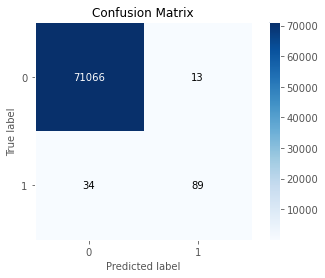

In [37]:
# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_tree)

# Imprimir classification report
print(classification_report(y_test, y_pred_tree, digits=4))

# Imprimir área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_tree)))

In [41]:
# Construção do Modelo com Balancemento dos Dados (RUS)

# Escolher os hyperparâmetros 
model_tree_rus = DecisionTreeClassifier(max_depth=8, criterion='entropy')

# Fit do Modelo (Treinar)
model_tree_rus.fit(X_train_un, y_train_un)

# Fazer previsões em cima dos dados de teste
y_pred_tree_rus = model_tree_rus.predict(X_test)

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9998    0.9007    0.9477     71079
           1     0.0156    0.9106    0.0307       123

    accuracy                         0.9007     71202
   macro avg     0.5077    0.9056    0.4892     71202
weighted avg     0.9981    0.9007    0.9461     71202

AUC: 0.9056



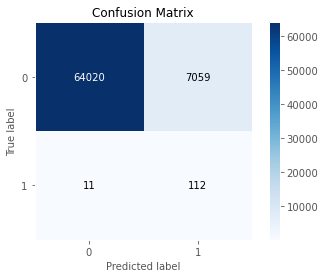

In [42]:
# Plotar matriz de confusão 
skplt.metrics.plot_confusion_matrix(y_test, y_pred_tree_rus)

# Imprimir relatório de classificação
print('Relatório de Classificação: \n', classification_report(y_test, y_pred_tree_rus, digits=4))

# Imprimir a Área sob Curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_tree_rus)))

In [44]:
# Construção do Modelo (SMOTE)

# Escolher os Hyperparâmetros
model_tree_smo = DecisionTreeClassifier(max_depth=6, criterion='entropy')

# Fit do Modelo(Treinar)
model_tree_smo.fit(X_train_over, y_train_over)

# Fazer previsões em cima dos dados de teste
y_pred_tree_smo = model_tree_smo.predict(X_test)

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9998    0.9611    0.9801     71079
           1     0.0383    0.8943    0.0734       123

    accuracy                         0.9610     71202
   macro avg     0.5190    0.9277    0.5268     71202
weighted avg     0.9981    0.9610    0.9785     71202

AUC: 0.9277



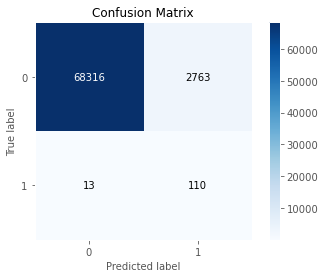

In [45]:
# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_tree_smo)

# Imprimir classification report
print('Relatório de Classificação: \n', classification_report(y_test, y_pred_tree_smo, digits=4))

# Imprimir área sob curva 
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test,y_pred_tree_smo)))

### III. SVM - Support Vector Machine <a id="43"></a>

In [47]:
# Importação do modelo
from sklearn import svm

# Instanciando e escolhendo os hyperparâmetros.
model_bal_svm = svm.SVC()

# Fit do modelo (treinamento)
model_bal_svm.fit(X_train_un, y_train_un)

# Realizando previsões em cima de novos dados
y_pred_svm = model_bal_svm.predict(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9997    0.9828    0.9912     71079
           1     0.0789    0.8537    0.1445       123

    accuracy                         0.9825     71202
   macro avg     0.5393    0.9182    0.5679     71202
weighted avg     0.9982    0.9825    0.9897     71202

Acurácia: 0.9825

AUC: 0.9182



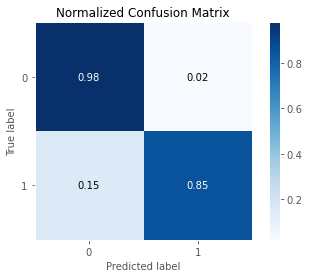

In [48]:
# Plotagem da matriz de confusão
fig = skplt.metrics.plot_confusion_matrix(y_test, y_pred_svm, normalize=True)

# Imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_svm, digits=4))

# Imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_svm)))

# Imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_svm)))

## Conclusão



* Os dados disponibilizados pelo Kaggle vieram bem tratados, tendo sido aplicada a técnica PCA (Principal Component Analysis) de redução de dimensionalidade. Todavia, houve a necessidade de realizar o balanceamento dos dados em virtude da característica das fraudes de cartão de crédito, feature Class, serem eventos que ocorreram com pouca frequência.
 
 
* Após a análise exploratória descobrimos que as colunas `Time` e `Amount` estavam com grande variação e por isso precisamos normalizá-las, processo efetuado através da `classe StandardScaler`.


* Na sequência dividimos nosso modelo em dados de treino (classificador) e teste (predição). E então, medimos sua qualidade comparando as classes preditas com as classes verdadeiras da base de teste para medir sua habilidade em classificar corretamente dados não vistos durante o treinamento.


* Finalmente, após fazer o balanceamento dos dados para que nossos modelos apresentem um melhor desempenho na hora de identificar transações fraudulentas, aplicamos os algoritmos de Machine Lerning: **Regressão Logística** com dados balanceados e não balanceados; **Árvores de Decisão** com dados balanceados e não balanceados; e **SVM**. 


*  Essa etapa mostrou-se extremamente valorosa porque podemos notar a importância do balanceamento dos dados. A introdução ao modelo SVM também foi interessante, por ser uma alternativa à Regressão Logística.
